# Lambda Presentation - Highly Imbalanced Classes in binary classification

## 2min summary

- Classification is when you are trying to classify elements of a set. When there are two groups, it's binary classification. 
- If the event is really rare, there can be problems in building a machine learning model. 
- We should be concerned about how we evaluate our model and how we construct our training data. 
- Common examples include fraud, cancer, and device failure

This repository is organized into the following sections:
1. What are highly imbalanced classes?
2. Performance metrics
3. Sampling strategies to get more balanced data
4.
7. SVM, KNN - Anomaly detection

## 1. What are highly imbalanced classes and why is it a problem?

+ ### Binary classification
    + Supervised machine learning
    + Labeled training data (0's and 1's)
    + Training data is mostly one of the two types
    + Imbalanced data leads to poor model generalization from training to testing

#### Class imbalance - What does it look like?
In a best case scenario as far as class balance is concerned, both classes would be equally represented, about 50% each. If we see something like the scatterplot below, we're probably in good shape as far as class balanced is concerned. Projected on a two dimensional plane, our classes are both separated and we have a good number of examples of both. Even visually, you can tell there are clear differences between these data. 

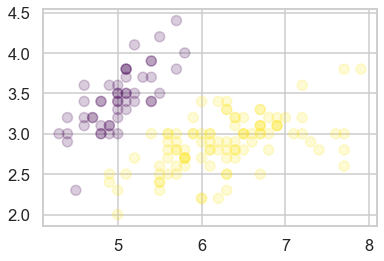

In [2]:
iris.target_balanced = np.where(iris.target==1, 2, iris.target)
plt.scatter(features[0], features[1], alpha=0.2, s=100, c= iris.target_balanced , cmap='viridis')

Conversely, here's a plot where there IS class imbalance. Visually, you can already probably infer some of the issues we'd have building a model using such a limited representation in one of these classes.

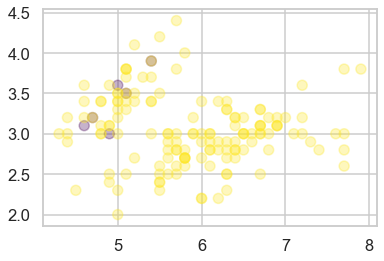

In [3]:
iris.target_imbalanced = iris.target_balanced
iris.target_imbalanced[6:] = 2

plt.scatter(features[0], features[1], alpha=0.3, s=100, c= iris.target_imbalanced , cmap='viridis')

Let's check out a model and see how to address class imbalance in action

In [23]:
# Load some data
data = 'C:/Users/VIgnesh/Desktop/dataset.csv'
df = pd.read_csv(data)

# preview of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
# percentage of labels within the Class column
df['Class'].value_counts()/np.float(len(df))

0    0.998273
1    0.001727
Name: Class, dtype: float64

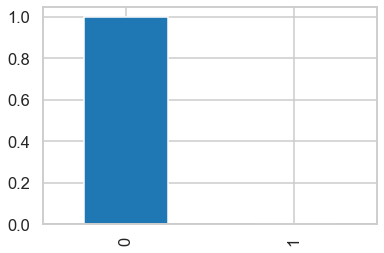

In [21]:
# view the distribution of percentages within the Class column
(df['Class'].value_counts()/np.float(len(df))).plot.bar()

## 1. Performance Metrics

There are many metrics for evaluating how good a binary classifier is doing in predicting the class labels for instances/examples. Below are some caveats and suggestions for choosing and interpreting the appropriate metrics.
Accuracy can be misleading. Since accuracy is simple the ratio of correctly predicted instances over all instances used for evaluation, it is possible to get a decent accuracy while having mostly incorrect predictions for the minority class.


## 2. Performance metrics for binary classification

### Accuracy can be misleading!
Accuracy can be misleading. Since accuracy is the ratio of correctly predicted instances over all instances used for evaluation, you can have awesome accuracy while having mostly incorrect predictions for the minority class. How's that possible? 

Let's suppose you want to predict the liklihood somebody has some rare diseas. Suppose it happens .01% of the time. If you just classify EVERYONE as not having the disease, you'd be correct 99.99% of the time and have an accuracy of 99.99%!

![Accuracy](https://upload.wikimedia.org/math/8/c/3/8c3f5b1cef3a52644de5056fd2fafee6.png)


### ROC
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

### Confusion matrix can be better
Confusion matrix helps break down the predictive performances on different classes.
![Confusion matrix](http://www.dataschool.io/content/images/2015/01/confusion_matrix2.png)

### Precision, Recall, and F1-Score
Precision is the fraction of relevant instances among the retrieved instances, while recall is the fraction of the total amount of relevant instances that were actually retrieved.

![Precision](https://upload.wikimedia.org/math/6/b/5/6b55614c9bcfa7596145265be222c4c9.png)
![Recall](https://upload.wikimedia.org/math/8/b/f/8bf211db6603570bbb1926f911097b18.png)
![F1-score](https://upload.wikimedia.org/math/9/9/1/991d55cc29b4867c88c6c22d438265f9.png)


### Always contextualize your model to the specific business objective
Give examples here where different metrics would be appropriate. 

In [25]:
# declare feature vector and target variable

X = df.drop(['Class'], axis=1)
y = df['Class']

# import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression


# instantiate the Logistic Regression classifier
logreg = LogisticRegression()


# fit the classifier to the imbalanced data
clf = logreg.fit(X, y)

# predict on the training data
y_pred = clf.predict(X)

C:\Users\VIgnesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
# import the accuracy metric
from sklearn.metrics import accuracy_score


# print the accuracy
accuracy = accuracy_score(y_pred, y)

print("Accuracy : %.2f%%" % (accuracy * 100.0))

Accuracy : 99.89%


#### Ridiculously high accuracy 
You should be suspicious when your model performs this well...something is probably off.

Let's check that confusion matrix!

In [27]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y, y_pred)

print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[284156    159]
 [   151    341]]


We have 341 True Negatives(TN) and 151 False Negatives(FN). We also have 151 false positives. Let's look at the other performance metrics.

In [28]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(y, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.68      0.69      0.69       492

    accuracy                           1.00    284807
   macro avg       0.84      0.85      0.84    284807
weighted avg       1.00      1.00      1.00    284807



## Insert intuitive explanations of these
### Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

So, precision is more concerned with the positive class than the negative class.

### Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

### f1-score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

## 3. Sampling strategies to get more balanced data
+ Up-sampling (Over sampling)
+ Down-sampling (Under sampling)
+ Many more sampling techniques implemented in [UnbalancedDataset](https://github.com/fmfn/UnbalancedDataset)

Upsampling is the process of randomly duplicating observations from the minority class in order to achieve a balanced dataset. So, it replicates the observations from minority class to balance the data. It is also known as upsampling. It may result in overfitting due to duplication of data points.

The most common way of over-sampling is to resample with replacement.

In [29]:
# import resample module 
from sklearn.utils import resample

# separate the minority and majority classes
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]

df_minority_oversampled = resample(df_minority, replace=True, n_samples=284315, random_state=0)

# combine majority class with oversampled minority class
df_oversampled = pd.concat([df_majority, df_minority_oversampled])


# display new class value counts
df_oversampled['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

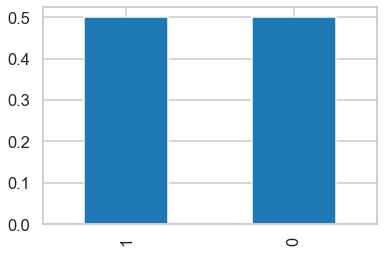

In [30]:
# view the distribution of percentages within the Class column
(df_oversampled['Class'].value_counts()/np.float(len(df_oversampled))).plot.bar()

In [31]:
X1 = df_oversampled.drop(['Class'], axis=1)
y1 = df_oversampled['Class']


# instantiate the Logistic Regression classifier
logreg1 = LogisticRegression()


# fit the classifier to the imbalanced data
clf1 = logreg1.fit(X1, y1)


# predict on the training data
y1_pred = clf1.predict(X1)


# print the accuracy
accuracy1 = accuracy_score(y1_pred, y1)

print("Accuracy : %.2f%%" % (accuracy1 * 100.0))

Accuracy : 93.88%


Wow! Our accuracy went down, but this is actually a good thing. Take a look at the other metrics:

Insert performnace metrics here.

The under-sampling methods work with the majority class. In these methods, we randomly eliminate instances of the majority class. It reduces the number of observations from majority class to make the dataset balanced. This method is applicable when the dataset is huge and reducing the number of training samples make the dataset balanced.

The most common technique for under-sampling is resampling without replacement.


In [32]:
# separate the minority and majority classes
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]

# undersample majority class
df_majority_undersampled = resample(df_majority, replace=True, n_samples=492, random_state=0)


# combine majority class with oversampled minority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# display new class value counts
df_undersampled['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
X2 = df_undersampled.drop(['Class'], axis=1)
y2 = df_undersampled['Class']

# instantiate the Logistic Regression classifier
logreg2 = LogisticRegression()

# fit the classifier to the imbalanced data
clf2 = logreg2.fit(X2, y2)

# predict on the training data
y2_pred = clf2.predict(X2)

# print the accuracy
accuracy2 = accuracy_score(y2_pred, y2)

print("Accuracy : %.2f%%" % (accuracy2 * 100.0))